In [1]:
!pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 4.4 MB/s eta 0:00:00


Something is weird about the facilities data. 

In [2]:
import pandas as pd
from glob import glob
from chardet import detect
input_files = glob(pathname='/kaggle/input/world-war-2-archive/*.csv', recursive=False)
for index, input_file in enumerate(input_files):
    detect_result = detect(open(file=input_file, mode= 'rb').read())
    print(detect_result)
    if index != 2:
        print('file: {} encoding: {} shape: {}'.format(input_file, detect_result['encoding'], 
                                                      pd.read_csv(filepath_or_buffer=input_file, encoding=detect_result['encoding']).shape))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
file: /kaggle/input/world-war-2-archive/vehicles.csv encoding: utf-8 shape: (193, 5)
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
file: /kaggle/input/world-war-2-archive/facilities.csv encoding: utf-8 shape: (260, 5)
{'encoding': 'Windows-1254', 'confidence': 0.5928614638802434, 'language': 'Turkish'}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
file: /kaggle/input/world-war-2-archive/Books.csv encoding: utf-8 shape: (484, 6)
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
file: /kaggle/input/world-war-2-archive/ships.csv encoding: utf-8 shape: (1786, 5)
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
file: /kaggle/input/world-war-2-archive/weapons.csv encoding: utf-8 shape: (385, 4)
{'encoding': 'utf-8', 'confidence': 0.938125, 'language': ''}
file: /kaggle/input/world-war-2-archive/events.csv encoding: utf-8 shape: (336, 3)


In [3]:
from numpy import nan
ships_df = pd.read_csv(filepath_or_buffer='/kaggle/input/world-war-2-archive/ships.csv', index_col=[0])
ships_df['year'] = ships_df['Launch Year'].apply(func=lambda x: nan if len(x.strip()) != 4 or x.strip() == '0000' else int(x))
ships_df.head()

,Name,Class,Country,Launch Year,year
0,A (Planned),No Classification,Germany,,NaN
1,ABSD-1,No Classification,United States,,NaN
2,ABSD-2,No Classification,United States,,NaN
3,Abukuma,Nagara-class Light Cruiser,Japan,1923,1923.0
4,Acasta,A and B-class Destroyer,United Kingdom,1929,1929.0


In [4]:
ships_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1786 entries, 0 to 1785
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1786 non-null   object 
 1   Class        1786 non-null   object 
 2   Country      1786 non-null   object 
 3   Launch Year  1786 non-null   object 
 4   year         1060 non-null   float64
dtypes: float64(1), object(4)
memory usage: 83.7+ KB


In [5]:
from plotly.express import histogram
histogram(data_frame=ships_df.sort_values(by='Country'), x='year', color='Country')

In [6]:
from plotly.express import bar
bar(data_frame=ships_df['Country'].value_counts(dropna=False).to_frame().reset_index(), x='Country', y='count', log_y=True)

In [7]:
from plotly.express import bar
bar(data_frame=ships_df[['Country', 'Class']].groupby(by=['Class', 'Country']).size().reset_index().rename({0: 'count'}, axis=1),
   y='Class', x='count', color='Country', height=5000)

(-0.5, 1199.5, 1199.5, -0.5)

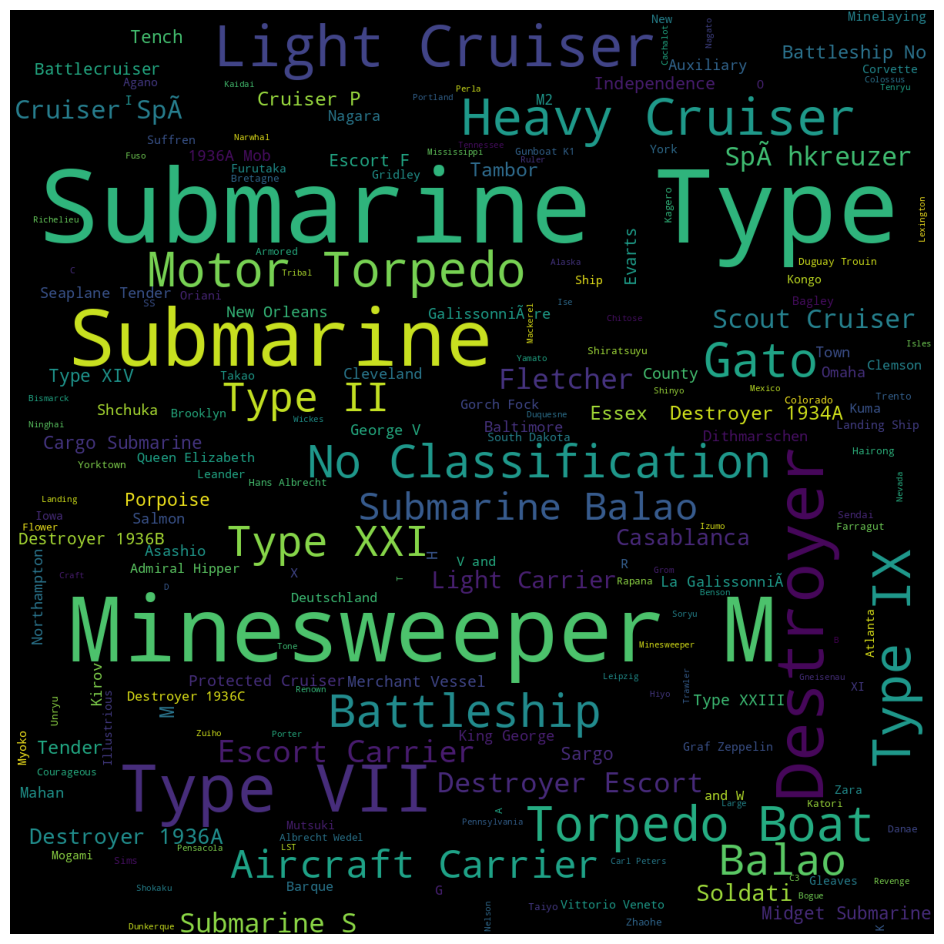

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=['class'] ).generate(text=' '.join(ships_df['Class'].values), ))
axis('off')